## 라이브러리 import

In [59]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

## 데이터 로드

In [60]:
iris = load_iris()

### 데이터 확인

In [61]:
print(type(iris))
print('=' * 20, 'data shape', '=' * 20)
print('Data:', iris.data.shape)
print('Label:', iris.target.shape)
print('First five data:\n', iris.data[:5])
print('First five label:\n', iris.target[:5])
print('iris dataset keys:\n', iris.keys())

<class 'sklearn.utils.Bunch'>
==================== data shape ====================
Data: (150, 4)
Label: (150,)
First five data:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
First five label:
 [0 0 0 0 0]
iris dataset keys:
 dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [62]:
print(iris.target_names)
print(iris.feature_names)

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


## feature, target 분리

In [63]:
x = iris.data
y = iris.target.reshape(-1, 1) # n행 1열로 만들어줌(one-hot encoding 하기위해)
print(y[:5])

[[0]
 [0]
 [0]
 [0]
 [0]]


## one-hot encoding

In [64]:
# target 값 one-hot encoding
ohe = OneHotEncoder(sparse=False) # sparse를 False로 설정해 희소행렬이 아닌 전체 행렬 받아옴
encoded_y = ohe.fit_transform(y)
print(encoded_y.shape)
print(encoded_y[:5])

(150, 3)
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


## train, test 분리

In [65]:
X_train, X_test, y_train, y_test = train_test_split(
    x, encoded_y, test_size=.2,
)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(120, 4) (30, 4)
(120, 3) (30, 3)


## 모델 생성

In [66]:
model = Sequential()
model.add(Dense(256, input_dim=4, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(3, activation='softmax')) # 출력 수는 1, 출력되는 값을 확률로(다 더하면 1)

In [67]:
opt = Adam(learning_rate=0.001) # scaling을 하지 않아 값이 발산할 수 있으므로 learning_rate 설정
model.compile(optimizer=opt, # 위에서 지정한 optimizer 사용
              loss='categorical_crossentropy', # 다중 분류기에선 이거
              metrics=['accuracy'], # binary_accuracy는 이진 분류기에서만
)
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 256)               1280      
_________________________________________________________________
dense_17 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_18 (Dense)             (None, 512)               66048     
_________________________________________________________________
dense_19 (Dense)             (None, 3)                 1539      
Total params: 101,763
Trainable params: 101,763
Non-trainable params: 0
_________________________________________________________________
None


## 모델 학습

In [68]:
fit_hist = model.fit(X_train, y_train, batch_size=5, epochs=5, verbose=1)

Epoch 1/5
24/24 [==============================] - 0s 2ms/step - loss: 0.7664 - accuracy: 0.6333
Epoch 2/5
24/24 [==============================] - 0s 2ms/step - loss: 0.3503 - accuracy: 0.8833
Epoch 3/5
24/24 [==============================] - 0s 3ms/step - loss: 0.2011 - accuracy: 0.9417
Epoch 4/5
24/24 [==============================] - 0s 3ms/step - loss: 0.1584 - accuracy: 0.9250
Epoch 5/5
24/24 [==============================] - 0s 2ms/step - loss: 0.2279 - accuracy: 0.9000


## 학습 결과 확인

In [69]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Final test set accuracy:', score[1])

Final test set accuracy: 1.0


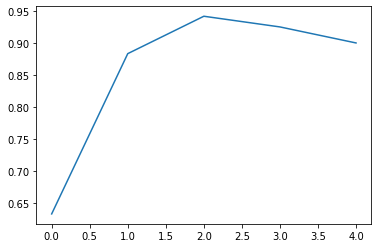

In [70]:
plt.plot(fit_hist.history['accuracy'])
plt.show()

In [76]:
# 임의의 행 추출해 모델 확인
labels = iris.target_names
my_sample = np.random.randint(30)
sample = X_test[my_sample]
sample = sample.reshape(1, 4) # 모델에 테스트하기 위해 2차원으로 바꿔줌
pred = model.predict(sample)
print(pred)
print(y_test[my_sample])
print('Target:', labels[np.argmax(y_test[my_sample])])
print('Prediction after learning:', labels[np.argmax(pred)])

[[9.9961096e-01 3.8909947e-04 5.3051372e-09]]
[1. 0. 0.]
Target: setosa
Prediction after learning: setosa
